<h1 align= center; style="color: white;background-color:black;
         font-size:47px; font-weight:bold;padding:20px;
    font-style:italic;border:3px  solid black;
    box-shadow:2px 2px 5px gray;text-align:center;border-radius:5px;
">  RESINDENTIAL RENT PRICE DATASET </span></h1>


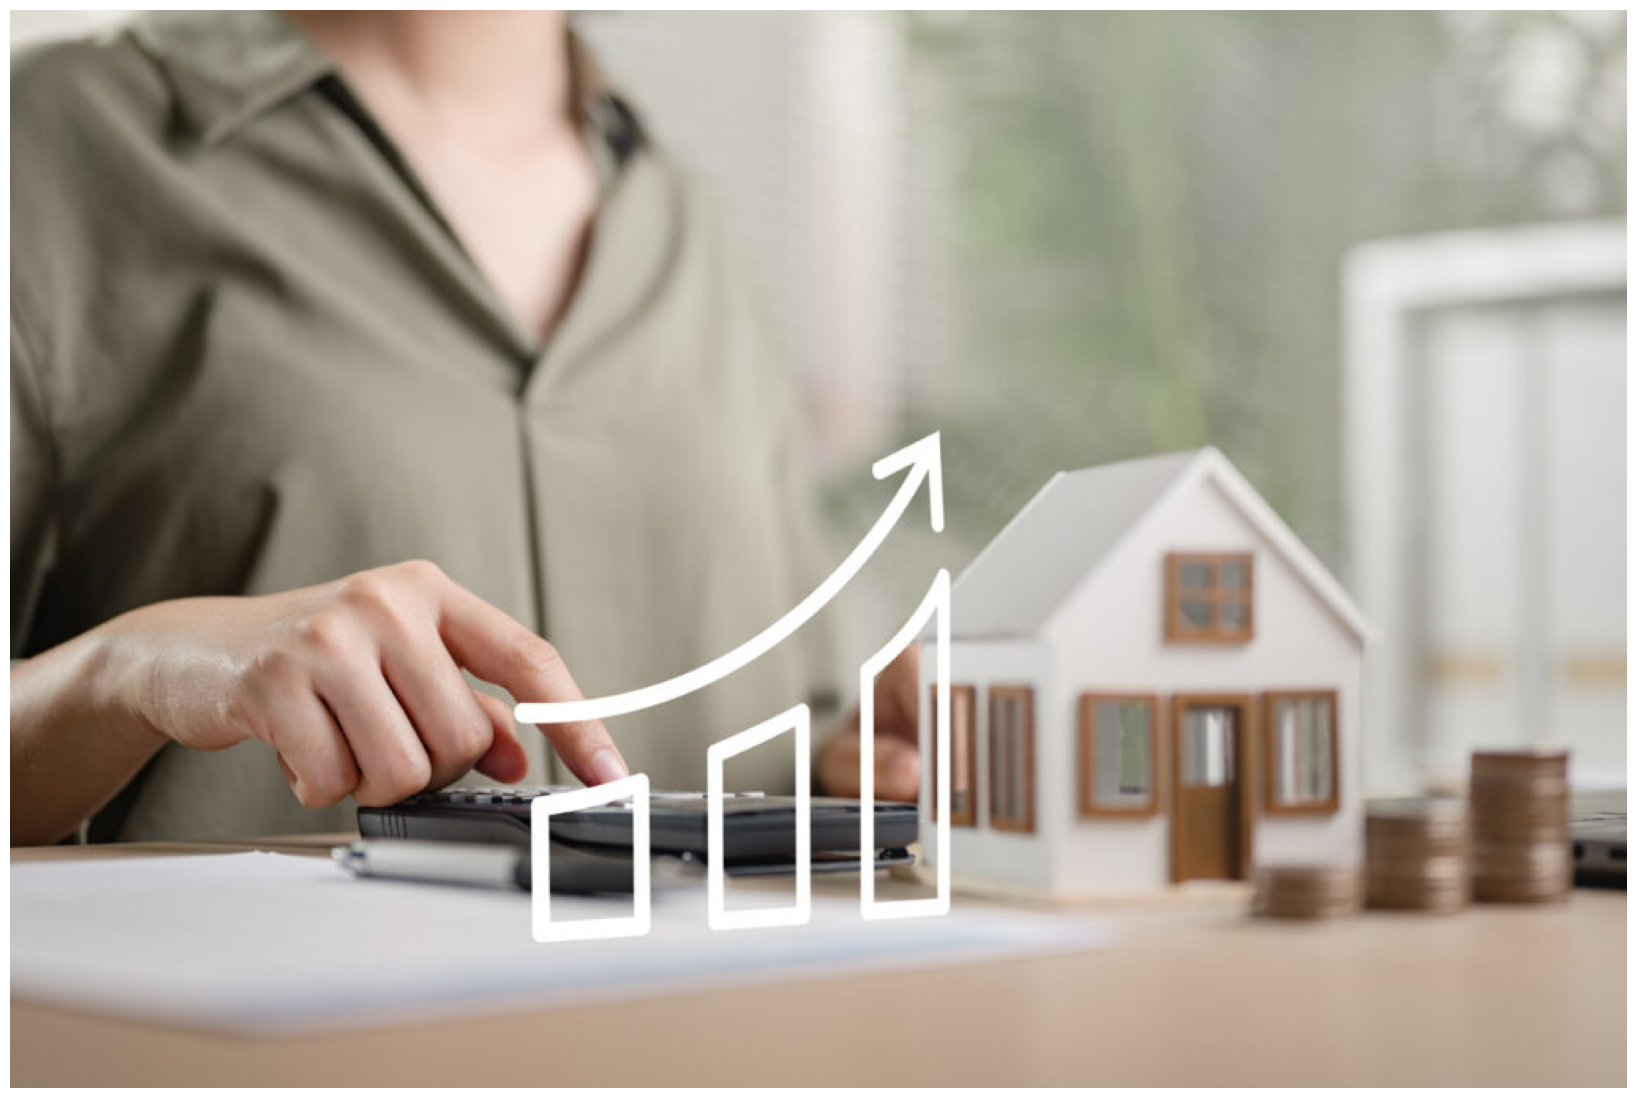

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


img = mpimg.imread(r"C:\Users\hp\Desktop\projects\RENT.jpg")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')

plt.show()


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">IMPORTING REQUIRED LIBRARIES AND STATISTICAL METRICS</h1> 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import mannwhitneyu






<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">READING THE DATASET</h1>

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\data.csv")

In [4]:
df

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0
...,...,...,...,...,...,...,...,...,...,...
7686,"3 BHK Flat for Rent in Saket, New Delhi",Saket,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0
7687,"2 BHK Flat for Rent in Phase 7 JP Nagar, Banga...",Phase 7 JP Nagar,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0
7688,"2 BHK Flat for Rent in Malpani Vivanta, Balewa...",Balewadi,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0
7689,"1 BHK Flat for Rent in Shalimar bagh, New Delhi",Shalimar bagh,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0


| Column Name           | Description                                                                    |
| --------------| ------------------------------------------------------------------------------ |
| **house_type** | Type or category of the house (e.g., apartment, independent house, etc.).      |
| **locality**   | Specific area or neighborhood where the house is located.                      |
| **city**       | City in which the property is situated (5 unique cities).                      |
| **area**       | Total area of the house in square feet.                                        |
| **beds**       | Number of bedrooms available in the house.                                     |
| **bathrooms**  | Number of bathrooms in the house.                                              |
| **balconies**  | Number of balconies associated with the house.                                 |
| **furnishing** | Furnishing status of the house (e.g., furnished, semi-furnished, unfurnished). |
| **area_rate**  |Rent price per square foot.                                                    |
| **rent**       | Total monthly rent of the house.                                               |


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;"> CHECKING SHAPE </h1>

In [5]:
df. shape

(7691, 10)

<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;">CHECKING INFO AND DESCRIBE </h1> 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   object 
 1   locality    7691 non-null   object 
 2   city        7691 non-null   object 
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   object 
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 601.0+ KB


In [7]:
df.describe()

,area,beds,bathrooms,balconies,area_rate,rent
count,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7.691000e+03
mean,1106.354180,2.208685,2.137043,0.817319,47.619989,5.479508e+04
std,1197.426843,0.993481,1.027677,1.243361,68.989657,9.742006e+04
min,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000e+03
25%,600.000000,1.000000,1.000000,0.000000,21.000000,1.500000e+04
50%,900.000000,2.000000,2.000000,0.000000,31.000000,2.800000e+04
75%,1300.000000,3.000000,3.000000,2.000000,54.000000,5.700000e+04
max,70000.000000,10.000000,10.000000,10.000000,2586.000000,2.700000e+06


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;">  CHECKING NULL VALUES,UNIQUE VALUES</h1> 

In [8]:
df.isna().sum()

house_type    0
locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
area_rate     0
rent          0
dtype: int64

In [9]:
col=df.columns
for i in col:
    u=df[i].unique()
    print(f'unique values in {i}:',u)

unique values in house_type: ['2 BHK Flat for Rent in Oberoi Woods, Goregaon East, Mumbai'
 '1 BHK Flat for Rent in Sapphire Lakeside, Powai, Mumbai'
 '1 BHK House for Rent in Mundhwa Pune' ...
 '1 BHK Flat for Rent in Link View, IC Colony, Mumbai'
 '2 BHK Flat for Rent in Malpani Vivanta, Balewadi, Pune'
 '2 BHK Flat for Rent in Govindpura, Dooravani Nagar, Bangalore']
unique values in locality: ['Goregaon East' 'Powai' 'Mundhwa' ... 'Anjanapura Township'
 'Qutub Vihar Phase 2' 'Govindpura']
unique values in city: ['Mumbai' 'Pune' 'Nagpur' 'Bangalore' 'New Delhi']
unique values in area: [ 897.  490.  550. ... 1599.  687. 1403.]
unique values in beds: [ 2  1  3  4  5 10  8  7  6]
unique values in bathrooms: [ 2  1  3  4  5  6  0  7  8  9 10]
unique values in balconies: [ 0  2  3  4  5 10  6  7  9  8]
unique values in furnishing: ['Semi-Furnished' 'Unfurnished' 'Furnished']
unique values in area_rate: [1.34000000e+02 8.20000000e+01 2.20000000e+01 8.00000000e+00
 2.50000000e+01 2.7000000

In [10]:
df['rent'] = df['rent'].round().astype(int)



<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;">CHECKING OUTLIERS
</h1> 

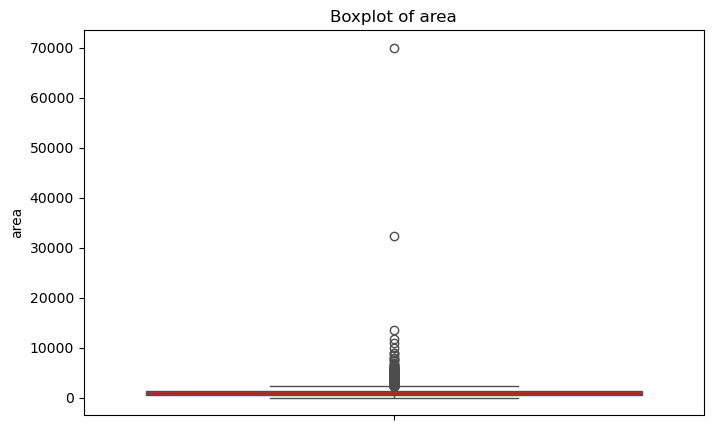

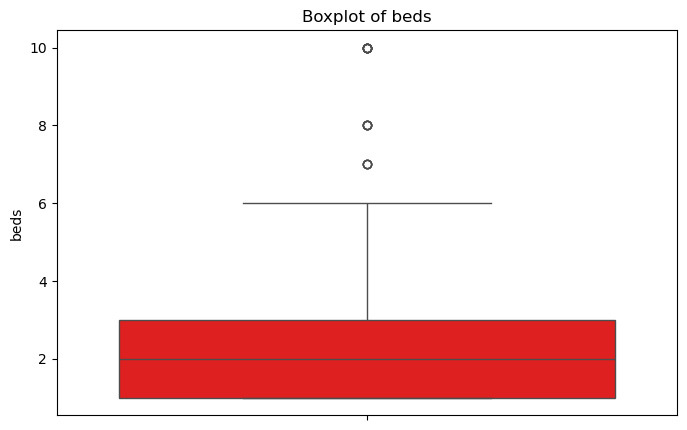

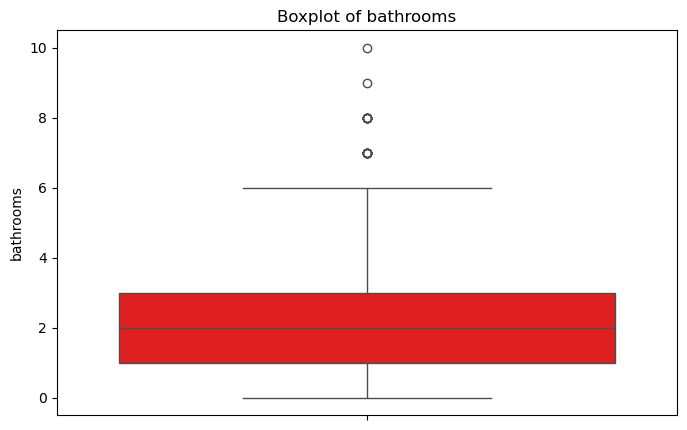

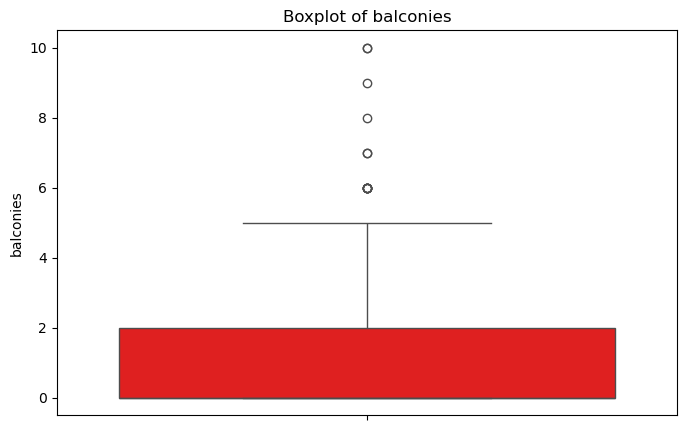

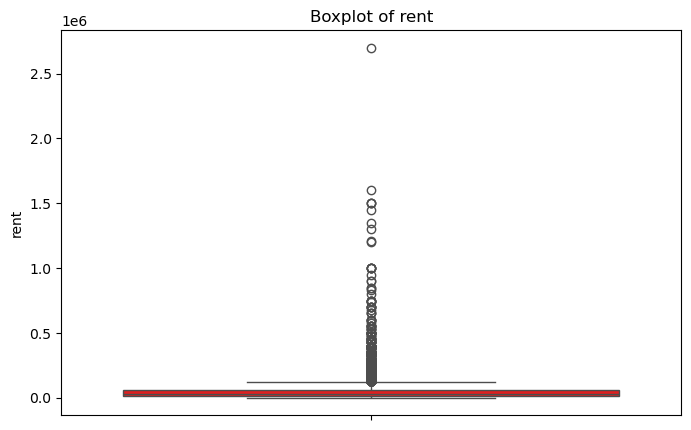

In [11]:
num_cols = ['area','beds','bathrooms','balconies','rent']
for col in num_cols:
    plt.figure(figsize=(8, 5))

    sns.boxplot(df[col],color='red')
    plt.title(f'Boxplot of {col}')
    plt.show()

Extreme values play a crucial role in this dataset, as removing or capping them changes the hypothesis test outcome from rejecting to failing to reject the null hypothesis

<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;">  HYPOTHESIS TESTING </h1> 

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
  Z-Test
</div>


In [12]:
# Separate rent values based on furnishing type
rent_furnished = df[df['furnishing'] == 'Furnished']['rent']
rent_unfurnished = df[df['furnishing'] == 'Unfurnished']['rent']

# Z-test
z_stat, p_value = ztest(
    rent_furnished,
    rent_unfurnished,
    value=0     # H0: difference in mean rent = 0
)
print("Z-statistic:", z_stat)
print("P-value:", p_value)


Z-statistic: 10.534344330396676
P-value: 5.999992938132352e-26


In [13]:
# Decision rule
alpha = 0.05
if p_value < alpha:
    print("Reject the Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject the Null Hypothesis


#### Ho=Mean rent of furnished = mean rent of unfurnished
#### H1=Mean rents are different
### average rent significantly different between Furnished and Unfurnished houses

C:\Users\hp\AppData\Local\Temp\ipykernel_9976\3914023185.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


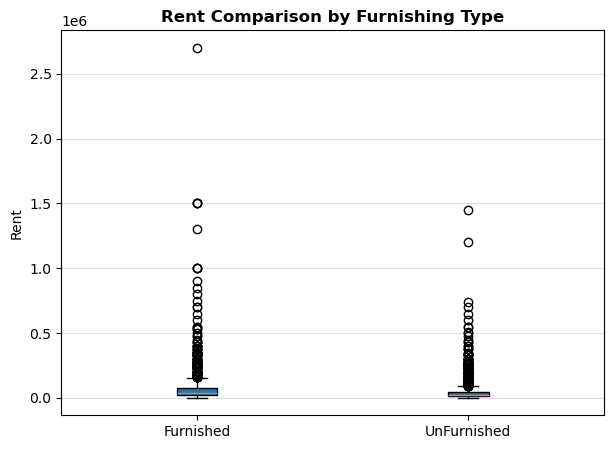

In [14]:
plt.figure(figsize=(7,5))
plt.boxplot(
    [rent_furnished, rent_unfurnished],
    labels=['Furnished', 'UnFurnished'],
    patch_artist=True
)

plt.title("Rent Comparison by Furnishing Type", fontweight='bold')
plt.ylabel("Rent")
plt.grid(axis='y', alpha=0.4)
plt.show()


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
Two-Tailed T-Test</div>



In [15]:
rent_1bhk = df[df['beds'] == 1]['rent']
rent_2bhk = df[df['beds'] == 2]['rent']
t_stat, p_values = ttest_ind(
    rent_1bhk,
    rent_2bhk,
    equal_var=False
)
print("T-statistic:", t_stat)
print("P-value:", p_values)


T-statistic: -15.475331256089481
P-value: 8.633969957016636e-53


In [16]:
alpha = 0.05
if p_values < alpha:
    print("Reject the null hypothesis: Significant difference exists.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

Reject the null hypothesis: Significant difference exists.


H₀: Mean rent of 1 BHK = Mean rent of 2 BHK

H₁: Mean rent of 1 BHK ≠ Mean rent of 2 BHK


average rent of 1 BHK houses different from 2 BHK houses

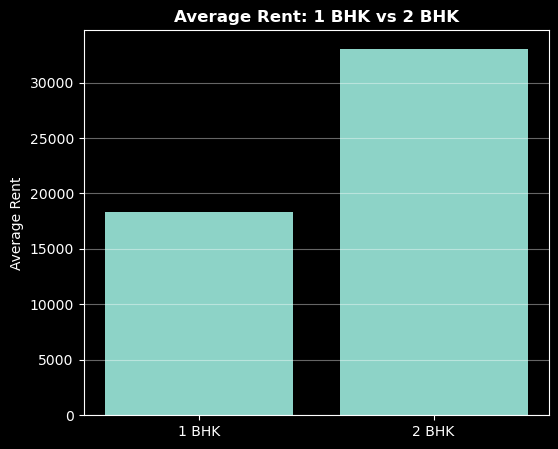

In [17]:
plt.style.use('dark_background')  
means = [rent_1bhk.mean(), rent_2bhk.mean()]
plt.figure(figsize=(6,5))
plt.bar(['1 BHK', '2 BHK'], means)
plt.title("Average Rent: 1 BHK vs 2 BHK", fontweight='bold')
plt.ylabel("Average Rent")
plt.grid(axis='y', alpha=0.4)

plt.show()


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
  One-Tailed T-Test
</div>



In [44]:
t_stat, p_val = ttest_ind(
    rent_2bhk,
    rent_1bhk,
    equal_var=False
)

p_one = p_val / 2

if (p_one < 0.05) and (t_stat > 0):
    print("Reject H0: 2 BHK rent is significantly higher than 1 BHK rent")
else:
    print("Fail to reject H0")


Reject H0: 2 BHK rent is significantly higher than 1 BHK rent


H₀: Mean rent (2 BHK) ≤ Mean rent (1 BHK)

H₁: Mean rent (2 BHK) > Mean rent (1 BHK)



In [19]:
print("Mean 1 BHK:", rent_1bhk.mean())
print("Mean 2 BHK:", rent_2bhk.mean())

print("Median 1 BHK:", rent_1bhk.median())
print("Median 2 BHK:", rent_2bhk.median())


Mean 1 BHK: 18337.42526964561
Mean 2 BHK: 33065.403479973735
Median 1 BHK: 13500.0
Median 2 BHK: 25000.0


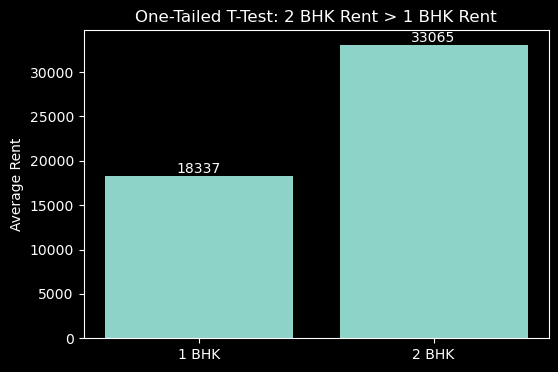

In [20]:
plt.style.use('dark_background')  
means = [rent_1bhk.mean(), rent_2bhk.mean()]
labels = ['1 BHK', '2 BHK']
plt.figure(figsize=(6,4))
plt.bar(labels, means)
plt.ylabel("Average Rent")
plt.title("One-Tailed T-Test: 2 BHK Rent > 1 BHK Rent")

# annotate values
for i, v in enumerate(means):
    plt.text(i, v, f"{int(v)}", ha='center', va='bottom')
plt.show()



<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
  Chi2 Test
</div>



In [21]:
# List of categorical columns in rent dataset
categorical_cols = ['locality','furnishing','house_type']

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['city'])
    
    chi2, p_vall, dof, expected = chi2_contingency(contingency_table)
    
    print(contingency_table)
    print(f"\nExpected Frequencies:{expected}")
    print(f"Chi2 Statistic: {chi2}")
    print(f"P-value: {p_vall}")
    
    if p_vall < 0.05:
        print(f"There is a statistically significant association between {col} and city.")
    else:
        print(f"There is no statistically significant association between {col} and city.")
    


city                  Bangalore  Mumbai  Nagpur  New Delhi  Pune
locality                                                        
1A Block Koramangala          1       0       0          0     0
1st Block East                1       0       0          0     0
90 Feet Road                  0       2       0          0     0
A Narayanapura                1       0       0          0     0
AECS Layout Block A           1       0       0          0     0
...                         ...     ...     ...        ...   ...
Yogi Nagar                    0       2       0          0     0
Yojna Vihar                   0       0       0          1     0
Zingabai Takali               0       0       8          0     0
jakkur Plantation             1       0       0          0     0
near Optima Heights           0       0       0          0     1

[1984 rows x 5 columns]

Expected Frequencies:[[0.23273957 0.223508   0.07736315 0.23507996 0.23130932]
 [0.23273957 0.223508   0.07736315 0.23507996 0.23

<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
ANOVA</div>



In [22]:
groups = df.groupby('city')['rent'].apply(list)
f_statistic, p_valu = stats.f_oneway(*groups)
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_valu}")
if p_valu < 0.05:
    print("There are significant differences between the groups.")
else:
    print("There are no significant differences between the groups.")


F-statistic: 174.9479574615358
P-value: 1.1860948024389026e-143
There are significant differences between the groups.


H₀: Mean rent is the same for all cities

H₁: At least one city has a different mean rent

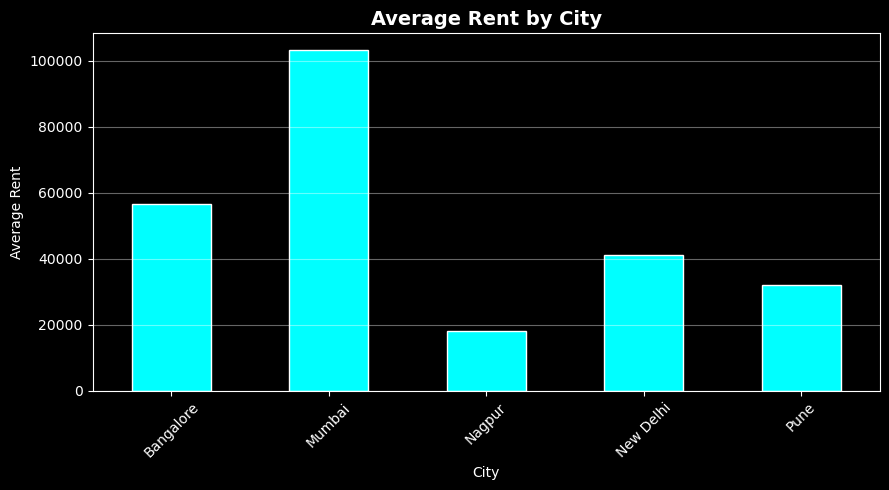

In [23]:
plt.style.use('dark_background')  

avg_rent_city = df.groupby('city')['rent'].mean()

plt.figure(figsize=(9,5))
avg_rent_city.plot(
    kind='bar',
    color='cyan',
    edgecolor='white'
)

plt.title("Average Rent by City", fontsize=14, fontweight='bold')
plt.xlabel("City")
plt.ylabel("Average Rent")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.4)

plt.tight_layout()
plt.show()




<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
Mann–Whitney U Test</div>


In [24]:
# Clean samples
rate_furnished = df[df['furnishing'] == 'Furnished']['area_rate'].dropna()
rate_unfurnished = df[df['furnishing'] == 'Unfurnished']['area_rate'].dropna()
# Mann–Whitney U Test
u_stat, p_val = mannwhitneyu(
    rate_furnished,
    rate_unfurnished,
    alternative='two-sided'
)
print("U-statistic:", u_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H₀: Area rate differs by furnishing type.")
else:
    print("Fail to reject H₀.")


U-statistic: 2883656.0
P-value: 2.235923083359481e-83
Reject H₀: Area rate differs by furnishing type.


C:\Users\hp\AppData\Local\Temp\ipykernel_9976\1116116499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


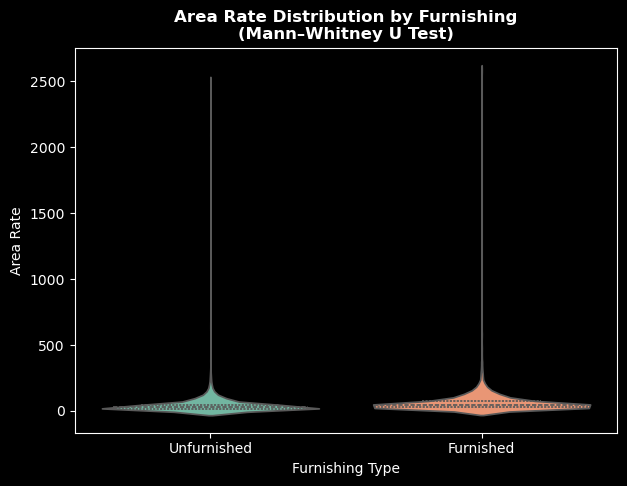

In [25]:
plt.figure(figsize=(7,5))
sns.violinplot(
    x='furnishing',
    y='area_rate',
    data=df[df['furnishing'].isin(['Furnished','Unfurnished'])],
    inner='quartile',
    palette='Set2'
)

plt.title("Area Rate Distribution by Furnishing\n(Mann–Whitney U Test)",
          fontweight='bold')
plt.xlabel("Furnishing Type")
plt.ylabel("Area Rate")
plt.show()


H₀: Median area rate is the same for furnished and unfurnished houses

H₁: Median area rate is different

difference in area rates based on furnishing status.



<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;">  ENCODING </h1>

In [26]:
le = LabelEncoder()
nominal_cols =['house_type','locality','city']
for col in nominal_cols:
    df[col] = le.fit_transform(df[col])

In [27]:
df = pd.get_dummies(df, columns=['furnishing'], drop_first=False)


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;"> SCALING </h1>

In [28]:
scaler=RobustScaler()
x=df.drop(columns=['rent'])
y=df['rent']
scaled=scaler.fit_transform(x)
s_scaled = pd.DataFrame(scaled, columns=x.columns)
df=pd.concat([s_scaled,y.reset_index(drop=True)],axis=1)


In [29]:
df

,house_type,locality,city,area,beds,bathrooms,balconies,area_rate,furnishing_Furnished,furnishing_Semi-Furnished,furnishing_Unfurnished,rent
0,-0.104112,-0.430287,-0.5,-0.004286,0.0,0.0,0.0,3.121212,0.0,1.0,0.0,120000
1,-0.753678,0.409399,-0.5,-0.585714,-0.5,-0.5,0.0,1.545455,0.0,1.0,0.0,40000
2,-0.562052,0.190078,1.0,-0.500000,-0.5,-0.5,0.0,-0.272727,0.0,0.0,1.0,12000
3,-0.286684,-0.341514,0.0,0.142857,0.0,0.0,0.0,-0.696970,0.0,0.0,1.0,8000
4,-0.704263,0.155614,-0.5,-0.435714,-0.5,-0.5,0.0,-0.181818,0.0,0.0,1.0,15000
...,...,...,...,...,...,...,...,...,...,...,...,...
7686,0.667295,0.537859,0.5,1.214286,0.5,0.5,0.0,-0.121212,1.0,0.0,0.0,47000
7687,-0.075443,0.388512,-1.0,0.214286,0.0,0.0,1.0,-0.121212,0.0,1.0,0.0,28000
7688,-0.172388,-0.898172,1.0,-0.237143,0.0,0.0,1.0,0.515152,0.0,0.0,1.0,35000
7689,-0.739721,0.681984,0.5,-0.714286,-0.5,-0.5,0.0,0.212121,0.0,1.0,0.0,15000


<h2 style="background-color:yellow; color:black; text-align:center;
    font-size:40px; font-weight:bold;padding:10px;"> MODEL BUILDING</h1>

In [30]:
x

,house_type,locality,city,area,beds,bathrooms,balconies,area_rate,furnishing_Furnished,furnishing_Semi-Furnished,furnishing_Unfurnished
0,2428,585,1,897.0,2,2,0,134.0,False,True,False
1,706,1389,1,490.0,1,1,0,82.0,False,True,False
2,1214,1179,4,550.0,1,1,0,22.0,False,False,True
3,1944,670,2,1000.0,2,2,0,8.0,False,False,True
4,837,1146,1,595.0,1,1,0,25.0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
7686,4473,1512,3,1750.0,3,3,0,27.0,True,False,False
7687,2504,1369,0,1050.0,2,2,2,27.0,False,True,False
7688,2247,137,4,734.0,2,2,2,48.0,False,False,True
7689,743,1650,3,400.0,1,1,0,38.0,False,True,False


In [31]:
y

0       120000
1        40000
2        12000
3         8000
4        15000
         ...  
7686     47000
7687     28000
7688     35000
7689     15000
7690     10000
Name: rent, Length: 7691, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=84)
model=LinearRegression()
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)


<div style="
    border-left:10px solid #2e7d32;
    padding:10px 14px;color:black; 
    font-size:30px;
    font-weight:800;
    background:#e8f5e9;
">
F Test</div>


In [33]:
n=len(y_test)
p=x_train.shape[1]

In [34]:
RSS=np.sum((y_test-y_pred) ** 2)
RSS

np.float64(7802925960762.941)

In [35]:
TSS = np.sum((y_test - np.mean(y_test)) ** 2)
TSS

np.float64(19374127944299.195)

In [36]:
ESS=TSS-RSS
ESS

np.float64(11571201983536.254)

In [37]:
MSE = RSS / (n - p - 1)
MSE

np.float64(3398486916.708598)

In [38]:
MSR = ESS / p
MSR

np.float64(1051927453048.7504)

In [39]:
F_statistic = MSR / MSE
F_statistic

np.float64(309.5281749878066)

In [40]:
p_val= 1 - stats.f.cdf(F_statistic, p, n - p - 1)
p_val

np.float64(1.1102230246251565e-16)

In [41]:
print('F-statistic:', F_statistic)
print('p-value:', p_val)

F-statistic: 309.5281749878066
p-value: 1.1102230246251565e-16


In [42]:
if p_val < 0.05:
    print('The model is significant at the 5% significance level.')
else:
    print('The model is not significant at the 5% significance level.')

The model is significant at the 5% significance level.


In [43]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

3380817140.7118464

The F-test checks whether my regression model actually explains rent or if it’s just random. Since the p-value is below 0.05, the model is statistically significant, meaning at least one feature meaningfully impacts rent

# Rental prices vary significantly across cities and housing configurations.

# Structural attributes (area, bedrooms, balconies) and furnishing status play a major role in rent determination.

# Location-based factors strongly influence housing characteristics and pricing.

# Statistical testing strengthens confidence in observed patterns beyond visual analysis.

# The project demonstrates correct application of both parametric and non-parametric statistical methods.